In [32]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import matplotlib.pyplot as plt
import csv 
import pandas as pd
import numpy as np


# Individual
1. comparison between accuracy simulation vs. real ibm run 
2. comparison execution time accuracy simulation vs. real ibm run 

In [7]:
data = pd.read_excel('/Users/carlottaholzle/Desktop/Quantum Computing project/Quantum.xlsx')

In [4]:
# Convert columns to numeric and clean up any time format issues
def convert_time_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    if isinstance(time_str, (int, float)):
        return time_str
    try:
        if 'm' in time_str:
            parts = time_str.split('m')
            minutes = int(parts[0].strip())
            seconds = float(parts[1].replace('s', '').strip())
            return minutes * 60 + seconds
        elif 's' in time_str:
            return float(time_str.replace('s', '').strip())
    except ValueError:
        return np.nan

data['time quantum part'] = data['time quantum part'].apply(convert_time_to_seconds)

In [8]:
carlotta_simulation = data[(data['Algorithm'] == 'Carlotta') & (data['Mode'] == 'Simulation')]
carlotta_ibm = data[(data['Algorithm'] == 'Carlotta') & (data['Mode'] == 'IBM')]
laura_ibm = data[(data['Algorithm'] == 'Laura') & (data['Mode'] == 'IBM')]
laura_simulation = data[(data['Algorithm'] == 'Laura') & (data['Mode'] == 'Simulation')]


In [9]:
# Filter data to only include rows where N is less than or equal to 69
carlotta_simulation_filtered = carlotta_simulation[(carlotta_simulation['N'] <= 69) & (carlotta_simulation['a'] == 2)]
carlotta_ibm_filtered = carlotta_ibm[(carlotta_ibm['N'] <= 69) & (carlotta_ibm['a'] == 2)]

In [10]:
print(carlotta_ibm_filtered)

   Algorithm Mode   N  a time quantum part  time classical part  accuracy  \
15  Carlotta  IBM  15  2                 5               0.0067  0.242188   
17  Carlotta  IBM  21  2                 9               0.0053  0.070312   
18  Carlotta  IBM  33  2                15               0.0073  0.000000   
20  Carlotta  IBM  35  2                15               0.0059  0.031250   
22  Carlotta  IBM  51  2                14                  NaN  0.031250   
24  Carlotta  IBM  55  2                16               0.0043  0.015625   
26  Carlotta  IBM  69  2                24                  NaN  0.023438   

      depth  qubits  shots                job id register  
15      NaN     NaN    NaN  cwpb7qp997wg008x5nwg       c4  
17      NaN     NaN    NaN  cwpavvf2ac5g008hmndg       c3  
18  61161.0    26.0    NaN  cwp9dk660bqg008nz1z0       c2  
20  61161.0    26.0    NaN  cwp84sv60bqg008nyzcg       c1  
22  61161.0    26.0    NaN                   NaN      NaN  
24  61161.0    26.0    

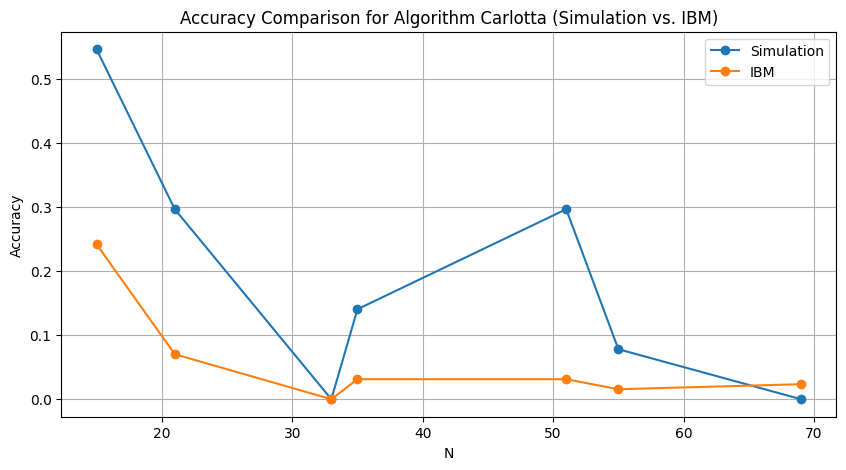

In [11]:

# 1. Comparison of accuracy for Mode Simulation vs. IBM for Algorithm Carlotta
plt.figure(figsize=(10, 5))
plt.plot(carlotta_simulation_filtered['N'], carlotta_simulation_filtered['accuracy'], label='Simulation', marker='o')
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['accuracy'], label='IBM', marker='o')
plt.title('Accuracy Comparison for Algorithm Carlotta (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

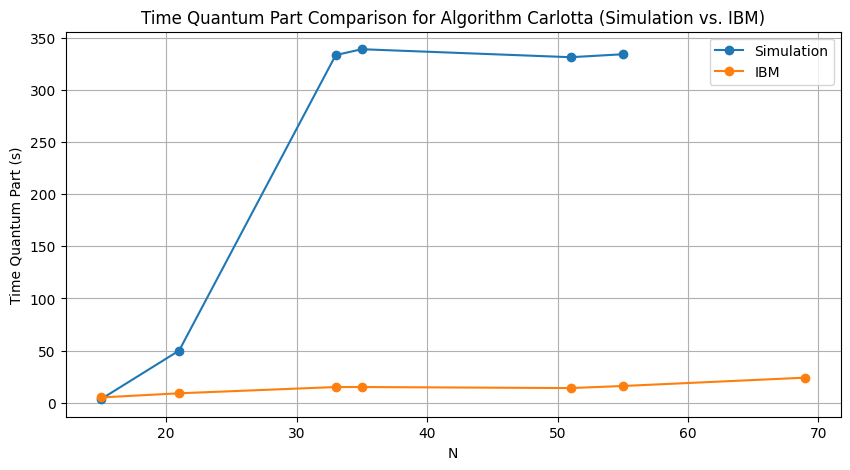

In [8]:
# 2. Comparison of time quantum part for Mode Simulation vs. IBM for Algorithm Carlotta
plt.figure(figsize=(10, 5))
plt.plot(carlotta_simulation_filtered['N'], carlotta_simulation_filtered['time quantum part'], label='Simulation', marker='o')
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['time quantum part'], label='IBM', marker='o')
plt.title('Time Quantum Part Comparison for Algorithm Carlotta (Simulation vs. IBM)')
plt.xlabel('N')
plt.ylabel('Time Quantum Part (s)')
plt.legend()
plt.grid(True)


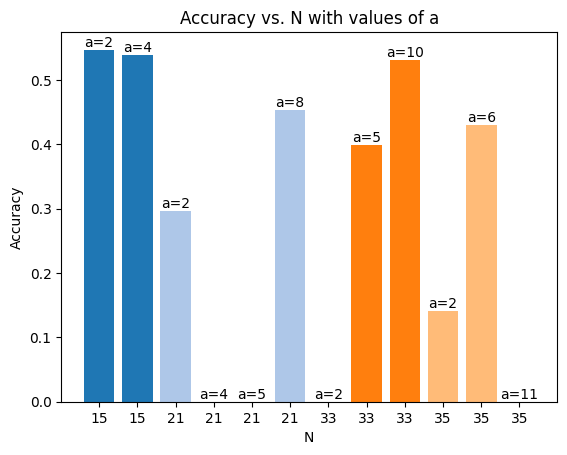

In [12]:
# Creating the data frame based on the provided image data
data = {
    'N': [15, 15, 21,21, 21, 21, 33, 33, 33, 35, 35, 35],
    'a': [2, 4, 2, 4, 5, 8, 2, 5, 10, 2, 6, 11],
    'accuracy': [0.546875, 0.539062, 0.296875, 0., 0., 0.453125, 0.0, 0.398438, 0.531250, 0.140625, 0.429688, 0.]
}
df = pd.DataFrame(data)

unique_N = df['N'].unique()
colors = plt.cm.tab20.colors  # Using a colormap for distinct colors
color_map = {n: colors[i % len(colors)] for i, n in enumerate(unique_N)}

# Plotting each bar with the corresponding color for its N value
for i, row in df.iterrows():
    plt.bar(i, row['accuracy'], color=color_map[row['N']], label=f'N={row["N"]}' if i == list(df['N']).index(row['N']) else "")


# Adding the value of 'a' above each bar
for bar, a_value in zip(bars, df['a']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'a={a_value}', ha='center', va='bottom')

plt.xlabel('N')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. N with values of a')
plt.xticks(df.index, df['N'])
plt.show()

# Group comparison 
1. Accuracy comparison between different code on ibm run 
2. Accuracy comparison between different code on simulation 
3. Time comparison between different code on ibm 


In [16]:
carlotta_ibm_filtered = carlotta_ibm[carlotta_ibm['a'] == 2]

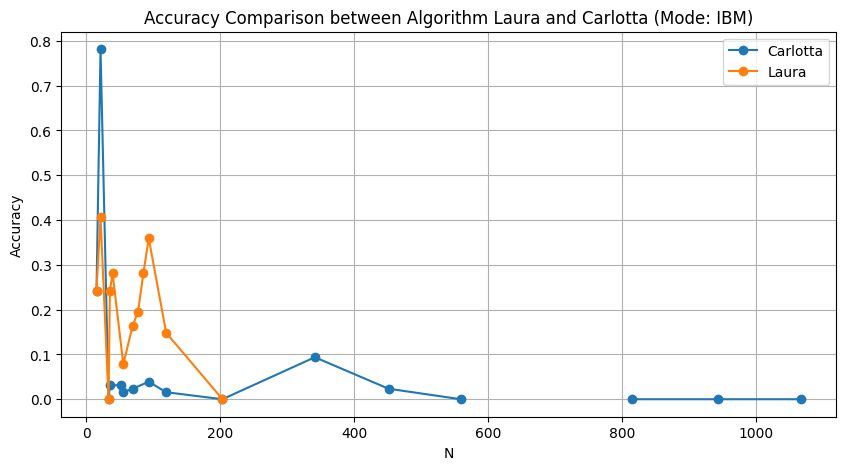

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['accuracy'], label='Carlotta', marker='o')
plt.plot(laura_ibm['N'], laura_ibm['accuracy'], label='Laura', marker='o')
plt.title('Accuracy Comparison between Algorithm Laura and Carlotta (Mode: IBM, a = 2)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

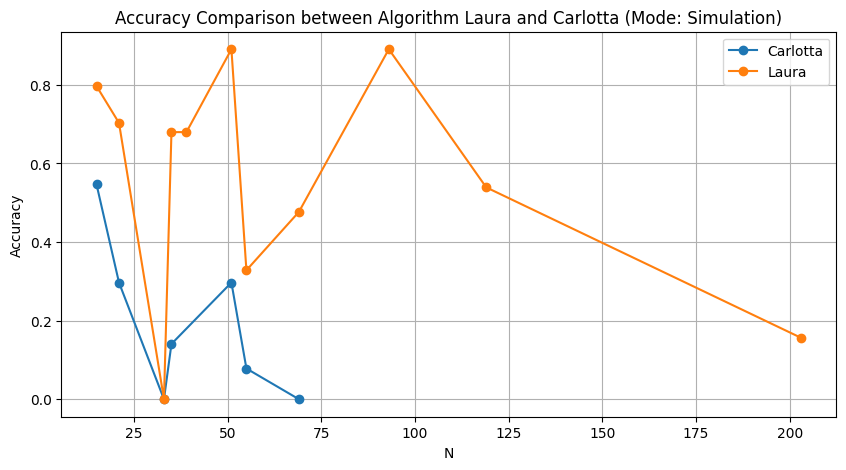

In [14]:
# 4. Accuracy comparison between Algorithm Laura and Carlotta for Mode Simulation
plt.figure(figsize=(10, 5))
plt.plot(carlotta_simulation_filtered['N'], carlotta_simulation_filtered['accuracy'], label='Carlotta', marker='o')
plt.plot(laura_simulation['N'], laura_simulation['accuracy'], label='Laura', marker='o')
plt.title('Accuracy Comparison between Algorithm Laura and Carlotta (Mode: Simulation)')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

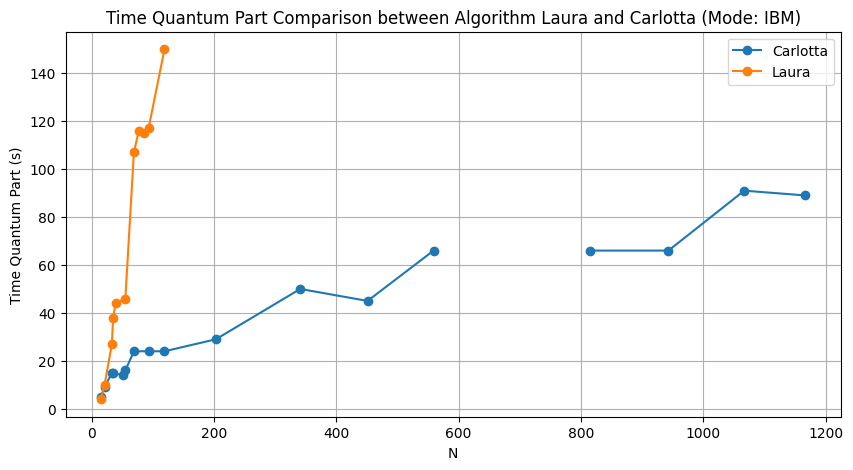

In [17]:
# 5. Time quantum comparison between Algorithm Laura and Carlotta for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['time quantum part'], label='Carlotta', marker='o')
plt.plot(laura_ibm['N'], laura_ibm['time quantum part'], label='Laura', marker='o')
plt.title('Time Quantum Part Comparison between Algorithm Laura and Carlotta (Mode: IBM)')
plt.xlabel('N')
plt.ylabel('Time Quantum Part (s)')
plt.legend()
plt.grid(True)

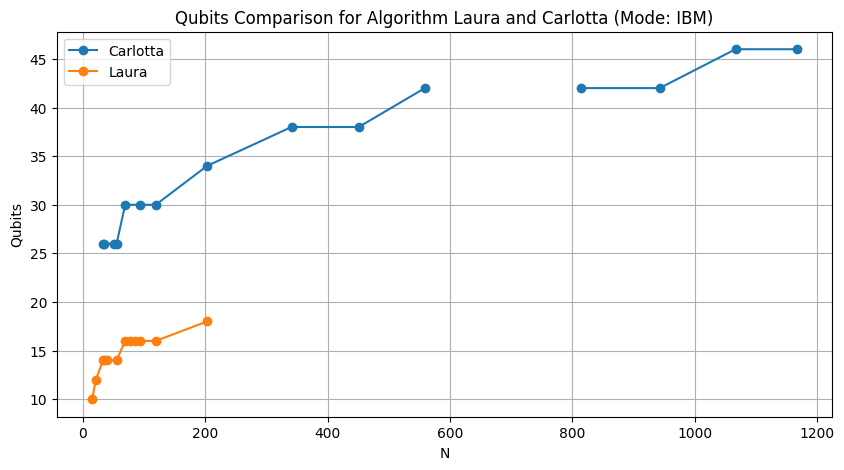

In [18]:
# 6. Qubits comparison for Algorithm Laura and Carlotta for Mode IBM
plt.figure(figsize=(10, 5))
plt.plot(carlotta_ibm_filtered['N'], carlotta_ibm_filtered['qubits'], label='Carlotta', marker='o')
plt.plot(laura_ibm['N'], laura_ibm['qubits'], label='Laura', marker='o')
plt.title('Qubits Comparison for Algorithm Laura and Carlotta (Mode: IBM)')
plt.xlabel('N')
plt.ylabel('Qubits')
plt.legend()
plt.grid(True)